<h1>NOTE :</h1> 
<h2># code -> commented code </h2>
<h2>## comment -> comment on executed code </h2>

## importing necessary librabies and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv('datasets/clean.csv')

## read from the csv file

In [3]:
# df.columns.to_list()

## the training set has altogether 31 columns; 30 columns for the x- and y- coordinate of 15 facial key-points and 1 column for the image 

In [4]:
# df.info()

## we can see the data type for each columns ; 30 columns has float type and the last 1 column has image object

## Lets see how our image looks like

In [5]:
# sample_image = df['Image'][0]
# print(sample_image)
# print(type(sample_image))

## our image is a string object which contains the gray values (ranging from 0-255) for each pixels separated by space; 
## we need to convert the string type into a numpy array of these gray values; 
## later we reshape this array in order to represent a 96x96 grayscale image


## converting string object to three dimensional numpy array of shape(96, 96, 1)

In [6]:
df['Image'] = df['Image'].apply(lambda x : np.reshape(np.array(x.split(' '), dtype=int), (96, 96, 1)))

## applying lambda function to convert the str type into numpy array

In [7]:
# image = df['Image'][0]
# print(type(image))

## now our image is no more a string object but rather it is a three dimensional numpy array of size(96, 96, 1); 

## defining some functions

In [8]:
def plot_sample(image, keypoint, axis, title):
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='o', s=10)
    axis.set_title(title)

## this function is used to plot both image and the keypoints

In [9]:
def load_images(dataframe):
    images = []
    for idx, image in dataframe.iterrows():
        images.append(image['Image'])
    images = np.array(images)/255. # normalized the gray-value in the range 0-1
    return images

## this function is used to generate a list of images

In [10]:
def load_keypoints(dataframe):
    temp = dataframe.drop('Image', axis = 1) # dropping everything from the 'Image' column; doing so, only the keypoints remains
    keypoints = []
    for idx, keypoint in temp.iterrows():
        keypoints.append(keypoint)
    keypoints = np.array(keypoints, dtype = 'float')
    return keypoints

## this function is used to generate a list of keypoints

## lets prepare our training keypoints and images

In [11]:
images = load_images(df)
keypoints = load_keypoints(df)

## lets plot a sample image as well as the 15 facial keypoints

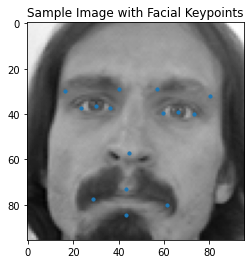

In [12]:
sample_image_index = 0

fig, axis = plt.subplots()
plot_sample(images[sample_image_index], keypoints[sample_image_index], axis, "Sample Image with Facial Keypoints")

## For training our neural network, the data-points might not be enough. So to increase the number of data points, we will perform data augmentation. Data augmentation is a technique to increase the diversity of our training set by applying random (but realistic) transformations such as image rotation, flipping, shifting, blurring, etc.
## Due to resoures limitation, we will only perform two types of augmentation : reflection and brightness alteration (decreasing image brightness), after which we will be having around 8k instances of data; which will be enough for training the model.

## Augmentation 1 : Image Flipping or Reflection

In [13]:
def reflection(images, keypoints):
    reflected_images = np.flip(images, axis=2) ## this will perform the horizontal flip on all the images in train_images

    reflected_keypoints = []
    for idx, keypoint in enumerate(keypoints):
        reflected_keypoints.append([96. - coordinate if idx%2 == 0 else coordinate for idx, coordinate in enumerate(keypoint)]) ## this will perform the reflection transformation on the keyponts (some mathematics is involved)
    return reflected_images, reflected_keypoints

## this function will perform reflection transformation on both the images and the keypoints

## lets apply this transformation onto our images and keypoins and append the results to the original list of images and the keypoints

In [14]:
reflected_images, reflected_keypoints = reflection(images, keypoints)

more_images = np.concatenate((images, reflected_images))
more_keypoints = np.concatenate((keypoints, reflected_keypoints))

## plotting the original and reflected image with keypoints

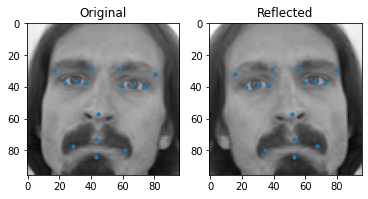

In [15]:
sample_image_index=0
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_sample(images[sample_image_index], keypoints[sample_image_index], ax1, title= "Original")
plot_sample(reflected_images[sample_image_index], reflected_keypoints[sample_image_index], ax2, title= "Reflected")

## Augmentation 2 : Brightness Alteration (Decreasing Image Brightness)

## lets look at how we can decrease the brightness of any image and compare how the original image and the dimmmed image look side-by-side

Text(0.5, 1.0, 'Dimmed')

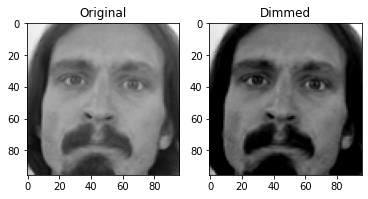

In [16]:
alpha = 0.72  # Simple contrast control
beta = -0.18  # Simple brightness control

sample_image = more_images[0]
new_image = np.clip(sample_image * 0.72 - 0.18, 0.0, 1.0) 

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(sample_image, cmap='gray')
ax1.set_title("Original")
ax2.imshow(new_image, cmap='gray')
ax2.set_title("Dimmed")

In [17]:
def brightness_alteration(images):
    alpha = 0.72  # Simple contrast control
    beta = -0.18  # Simple brightness control

    dimmed_images = np.clip(images * 0.72 - 0.18, 0.0, 1.0)

    return dimmed_images

## this function will generate images with decreased brightness

## now lets apply this transformation onto our images and keypoins and append the results to the original list of images and the keypoints

In [18]:
dimmed_images = brightness_alteration(more_images)

final_images = np.concatenate((more_images, dimmed_images))
final_keypoints = np.concatenate((more_keypoints, more_keypoints))

## plotting the original and dimmed image with keypoints

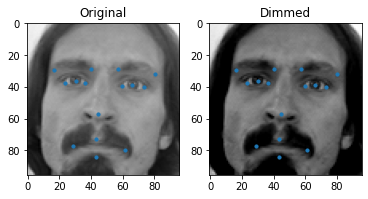

In [19]:
sample_image_index=0
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_sample(more_images[sample_image_index], more_keypoints[sample_image_index], ax1, title= "Original")
plot_sample(dimmed_images[sample_image_index], more_keypoints[sample_image_index], ax2, title= "Dimmed")